In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

#reading data
df = pd.read_csv("/content/drive/MyDrive/Data BMKG Offline/Data BMKG Offline.csv")

Mounted at /content/drive


# Eksplorasi

In [ ]:
# cek missing values
missing_values = df.isnull().sum()
print(missing_values)

Tanggal      0
Tavg         0
RH_avg       0
RR         156
ddd_x        0
ff_avg       0
dtype: int64


In [ ]:
# Mengonversi kolom Tanggal menjadi tipe data datetime:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')
df.set_index('Tanggal', inplace=True)

# grafik

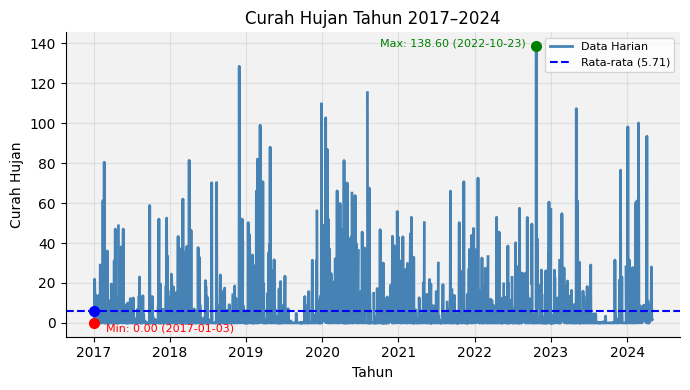

In [ ]:
# Cari nilai max dan min pada RR
max_val = df['RR'].max()
min_val = df['RR'].min()
mean_val = df['RR'].mean()
max_idx = df['RR'].idxmax()
min_idx = df['RR'].idxmin()
# Format tanggal
max_date_str = pd.to_datetime(max_idx).strftime('%Y-%m-%d')
min_date_str = pd.to_datetime(min_idx).strftime('%Y-%m-%d')
# Plot
fig, ax = plt.subplots(figsize=(7, 4))
# latar belakang area plotting
ax.set_facecolor('#f2f2f2')  # warna biru muda
# seluruh background (termasuk luar area plot)
fig.patch.set_facecolor('white')

# Grafik utama
ax.plot(df.index, df['RR'], color='steelblue', linewidth=2, label='Data Harian')
# Garis rata-rata
ax.axhline(mean_val, color='blue', linestyle='--', linewidth=1.5, label=f'Rata-rata ({mean_val:.2f})')
# Titik rata-rata (misalnya di awal data)
ax.plot(df.index[0], mean_val, 'bo', markersize=7)
# Titik maksimum dan minimum
ax.plot(max_idx, max_val, 'go', markersize=7)
ax.plot(min_idx, min_val, 'ro', markersize=7)

# Anotasi max
ax.annotate(f'Max: {max_val:.2f} ({max_date_str})',
            xy=(max_idx, max_val),
            xytext=(-60, 0),
            textcoords='offset points',
            ha='center',
            fontsize=8,
            color='green')
# Anotasi min
ax.annotate(f'Min: {min_val:.2f} ({min_date_str})',
            xy=(min_idx, min_val),
            xytext=(55, -6),
            textcoords='offset points',
            ha='center',
            fontsize=8,
            color='red')

# Hilangkan bingkai (spines)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Tambahkan grid
ax.grid(alpha=0.3)

# Label dan judul
ax.set_xlabel('Tahun')
ax.set_ylabel('Curah Hujan')
ax.set_title('Curah Hujan Tahun 2017–2024', fontsize=12)
ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

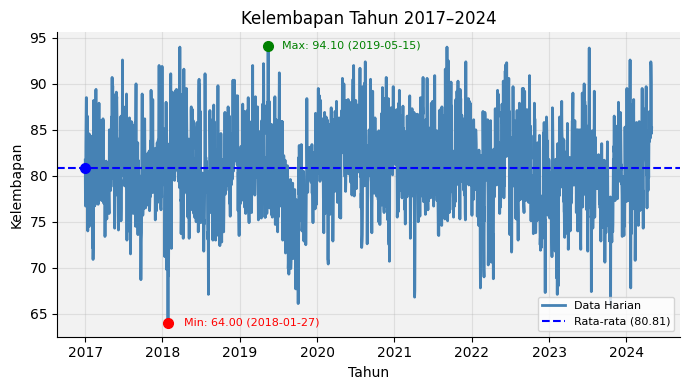

In [ ]:
# Grafik utama
ax.plot(df.index, df['RH_avg'], color='steelblue', linewidth=2, label='Data Harian')
# Garis rata-rata
ax.axhline(mean_val, color='blue', linestyle='--', linewidth=1.5, label=f'Rata-rata ({mean_val:.2f})')
# Titik rata-rata (misalnya di awal data)
ax.plot(df.index[0], mean_val, 'bo', markersize=7)
# Titik maksimum dan minimum
ax.plot(max_idx, max_val, 'go', markersize=7)
ax.plot(min_idx, min_val, 'ro', markersize=7)

# Anotasi max
ax.annotate(f'Max: {max_val:.2f} ({max_date_str})',
            xy=(max_idx, max_val),
            xytext=(60, -2),
            textcoords='offset points',
            ha='center',
            fontsize=8,
            color='green')

# Anotasi min
ax.annotate(f'Min: {min_val:.2f} ({min_date_str})',
            xy=(min_idx, min_val),
            xytext=(60, -2),
            textcoords='offset points',
            ha='center',
            fontsize=8,
            color='red')

# Hilangkan bingkai (spines)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Tambahkan grid
ax.grid(alpha=0.3)

# Label dan judul
ax.set_xlabel('Tahun')
ax.set_ylabel('Kelembapan')
ax.set_title('Kelembapan Tahun 2017–2024', fontsize=12)
ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

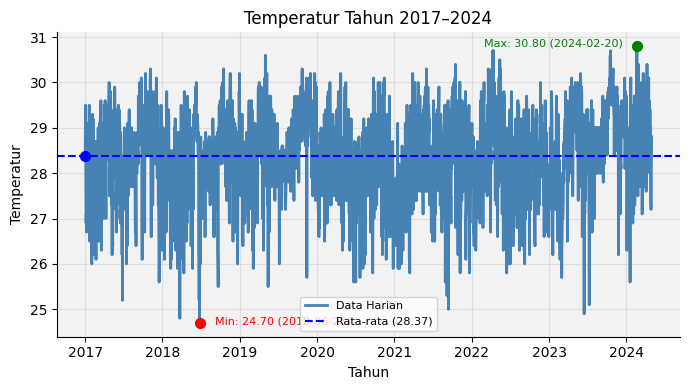

In [ ]:
# Grafik utama
ax.plot(df.index, df['Tavg'], color='steelblue', linewidth=2, label='Data Harian')
# Garis rata-rata
ax.axhline(mean_val, color='blue', linestyle='--', linewidth=1.5, label=f'Rata-rata ({mean_val:.2f})')
# Titik rata-rata (misalnya di awal data)
ax.plot(df.index[0], mean_val, 'bo', markersize=7)
# Titik maksimum dan minimum
ax.plot(max_idx, max_val, 'go', markersize=7)
ax.plot(min_idx, min_val, 'ro', markersize=7)
# Anotasi max
ax.annotate(f'Max: {max_val:.2f} ({max_date_str})',
            xy=(max_idx, max_val),
            xytext=(-60, 0),
            textcoords='offset points',
            ha='center',
            fontsize=8,
            color='green')
# Anotasi min
ax.annotate(f'Min: {min_val:.2f} ({min_date_str})',
            xy=(min_idx, min_val),
            xytext=(60, -1),
            textcoords='offset points',
            ha='center',
            fontsize=8,
            color='red')

# Hilangkan bingkai (spines)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Tambahkan grid
ax.grid(alpha=0.3)

# Label dan judul
ax.set_xlabel('Tahun')
ax.set_ylabel('Temperatur')
ax.set_title('Temperatur Tahun 2017–2024', fontsize=12)
ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

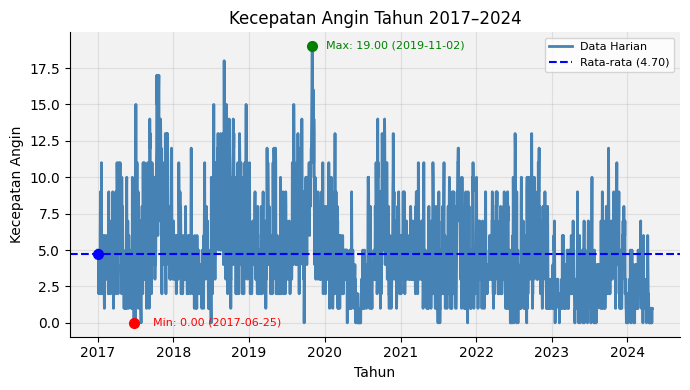

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(7, 4))
# Ubah latar belakang area plotting ke biru muda
ax.set_facecolor('#f2f2f2')  # warna biru muda
# Jika ingin seluruh background (termasuk luar area plot) juga diwarnai:
fig.patch.set_facecolor('white')  # atau juga bisa '#f0f8ff'

# Grafik utama
ax.plot(df.index, df['ff_avg'], color='steelblue', linewidth=2, label='Data Harian')
# Garis rata-rata
ax.axhline(mean_val, color='blue', linestyle='--', linewidth=1.5, label=f'Rata-rata ({mean_val:.2f})')
# Titik rata-rata (misalnya di awal data)
ax.plot(df.index[0], mean_val, 'bo', markersize=7)
# Titik maksimum dan minimum
ax.plot(max_idx, max_val, 'go', markersize=7)
ax.plot(min_idx, min_val, 'ro', markersize=7)

# Anotasi max
ax.annotate(f'Max: {max_val:.2f} ({max_date_str})',
            xy=(max_idx, max_val),
            xytext=(60, -2),
            textcoords='offset points',
            ha='center',
            fontsize=8,
            color='green')

# Anotasi min
ax.annotate(f'Min: {min_val:.2f} ({min_date_str})',
            xy=(min_idx, min_val),
            xytext=(60, -2),
            textcoords='offset points',
            ha='center',
            fontsize=8,
            color='red')

# Hilangkan bingkai (spines)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Tambahkan grid
ax.grid(alpha=0.3)

# Label dan judul
ax.set_xlabel('Tahun')
ax.set_ylabel('Kecepatan Angin')
ax.set_title('Kecepatan Angin Tahun 2017–2024', fontsize=12)
ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

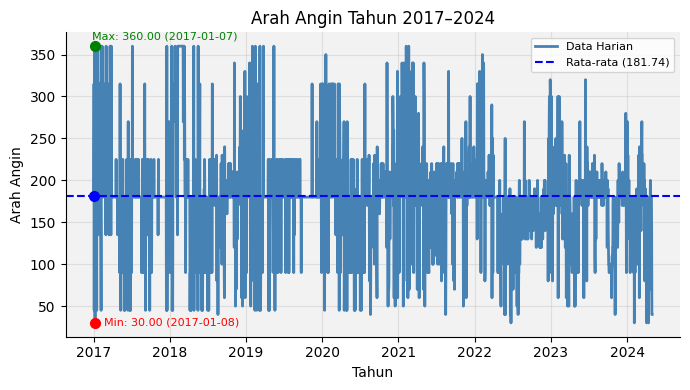

In [ ]:
# Format tanggal
max_date_str = pd.to_datetime(max_idx).strftime('%Y-%m-%d')
min_date_str = pd.to_datetime(min_idx).strftime('%Y-%m-%d')

# Plot
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_facecolor('#f2f2f2')
fig.patch.set_facecolor('white')

# Grafik  utama
ax.plot(df.index, df['ddd_x'], color='steelblue', linewidth=2, label='Data Harian')
# Titik maksimum dan minimum
ax.plot(max_idx, max_val, 'go', markersize=7)
ax.plot(min_idx, min_val, 'ro', markersize=7)
# Garis rata-rata
ax.axhline(mean_val, color='blue', linestyle='--', linewidth=1.5, label=f'Rata-rata ({mean_val:.2f})')
# Titik rata-rata (misalnya di awal data)
ax.plot(df.index[0], mean_val, 'bo', markersize=7)

# Anotasi max
ax.annotate(f'Max: {max_val:.2f} ({max_date_str})',
            xy=(max_idx, max_val),
            xytext=(50, 5),
            textcoords='offset points',
            ha='center',
            fontsize=8,
            color='green')

# Anotasi min
ax.annotate(f'Min: {min_val:.2f} ({min_date_str})',
            xy=(min_idx, min_val),
            xytext=(55, -2),
            textcoords='offset points',
            ha='center',
            fontsize=8,
            color='red')
# Hilangkan bingkai
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Tambahkan grid
ax.grid(alpha=0.3)

# Label dan judul
ax.set_xlabel('Tahun')
ax.set_ylabel('Arah Angin')
ax.set_title('Arah Angin Tahun 2017–2024', fontsize=12)
ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Data Processing

# visualisasi interpolasi linear

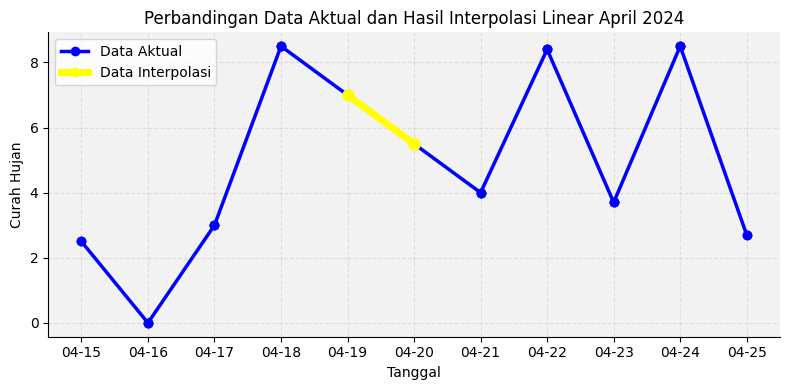

In [ ]:
# Filter data
start_date = '2024-04-15'
end_date = '2024-04-25'
df_filtered = df.loc[start_date:end_date].copy()

# Tanggal interpolasi
tanggal_interpolasi = pd.to_datetime([
    '2024-04-19',
    '2024-04-20'
])

# Pastikan index urut
df_filtered.sort_index(inplace=True)

# Buat plot dan axis
fig, ax = plt.subplots(figsize=(8, 4))
# Loop per segmen dua titik
for i in range(len(df_filtered.index) - 1):
    t1 = df_filtered.index[i]
    t2 = df_filtered.index[i + 1]
    y1 = df_filtered['RR'].loc[t1]
    y2 = df_filtered['RR'].loc[t2]

    # Jika kedua titik interpolasi → kuning
    if t1 in tanggal_interpolasi and t2 in tanggal_interpolasi:
        ax.plot([t1, t2], [y1, y2], color='yellow', linewidth=5, marker='o', label='Data Interpolasi' if t1 == tanggal_interpolasi[0] else "")
    else:
        ax.plot([t1, t2], [y1, y2], color='blue', linewidth=2.5, marker='o', label='Data Aktual' if i == 0 else "")
# Plot marker per titik, warna berdasarkan interpolasi atau bukan
for t in df_filtered.index:
    y = df_filtered.loc[t, 'RR']
    if t in tanggal_interpolasi:
        ax.plot(t, y, 'o', color='yellow', markersize=8)
    else:
        ax.plot(t, y, 'o', color='blue', markersize=6)
# Label tanggal lengkap
ax.set_xticks(df_filtered.index)
ax.set_xticklabels([d.strftime('%m-%d') for d in df_filtered.index], rotation=0)

# Styling grid
ax.grid(True, linestyle='--', alpha=0.3)

# Ubah latar belakang area plotting
ax.set_facecolor('#f2f2f2')  # area dalam (abu terang)
fig.patch.set_facecolor('white')  # area luar putih

# Hilangkan bingkai atas dan kanan
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Judul dan label
ax.set_title('Perbandingan Data Aktual dan Hasil Interpolasi Linear April 2024', fontsize=12)
ax.set_xlabel('Tanggal')
ax.set_ylabel('Curah Hujan')
ax.legend()
plt.tight_layout()
plt.show()

# data preprocessing

In [ ]:
# Normalisasi data fitur dan target menggunakan MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

features_norm = scaler_features.fit_transform(features)
target_norm = scaler_target.fit_transform(target)

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(
    features_norm, target_norm, test_size=0.2, shuffle=False
)

In [ ]:
def create_sequences(X, y, window_size):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i + window_size])  # Ambil window_size timesteps
        y_seq.append(y[i + window_size])   # Target di langkah berikutnya
    return np.array(X_seq), np.array(y_seq)

# Tentukan panjang window size (misalnya 5 hari)
window_size = 12

# Buat sequence
X_train, y_train = create_sequences(features_train, target_train, window_size)
X_test, y_test = create_sequences(features_test, target_test, window_size)

print(f"Train shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Test shapes: X={X_test.shape}, y={y_test.shape}")


Train shapes: X=(2132, 12, 5), y=(2132, 1)
Test shapes: X=(533, 12, 5), y=(533, 1)


# Model

In [ ]:
# Definisi model LSTM
model = tf.keras.Sequential()

# Tambahkan Input layer
model.add(tf.keras.Input(shape=(window_size, X_train.shape[2])))

# LSTM layer 1
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

# LSTM layer 2
model.add(tf.keras.layers.LSTM(64, return_sequences=False))

# Layer output
model.add(tf.keras.layers.Dense(1))


In [ ]:
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(
    optimizer=optimizer,
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.RootMeanSquaredError()]  # Ganti MAE dengan RMSE
)

In [ ]:
# Melatih model dengan validation_split
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% data train untuk validation
    batch_size=32,
    epochs=100,
    shuffle=False  # Penting untuk menjaga urutan time series
)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0092 - root_mean_squared_error: 0.0952 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0077 - root_mean_squared_error: 0.0870 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0940
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0076 - root_mean_squared_error: 0.0865 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0075 - root_mean_squared_error: 0.0859 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0920
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0075 - root_mean_squared_error: 0.0857 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0912
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0073 - root_mean_squared_error: 0.0849 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0900
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step 

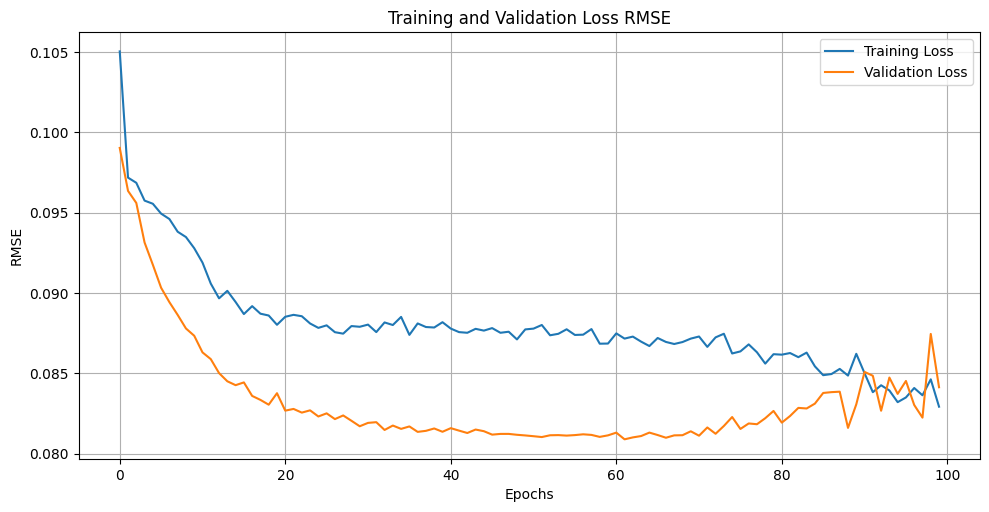

In [ ]:
# Membuat plot training loss dan validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['root_mean_squared_error'], label='Training Loss')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.title('Training and Validation Loss RMSE')
plt.show()

# evaluasi model data test normalisasi

In [ ]:
# 1. Lakukan prediksi pada data test
predictions = model.predict(X_test)
# 2. Sesuaikan dimensi data asli (target normalisasi) dengan prediksi
y_test_scaled = y_test[:len(predictions)].reshape(-1, 1)
test_rmse_scaled = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE for Test Data (Normalized): {test_rmse_scaled}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RMSE for Test Data (Normalized): 0.08299776608995642


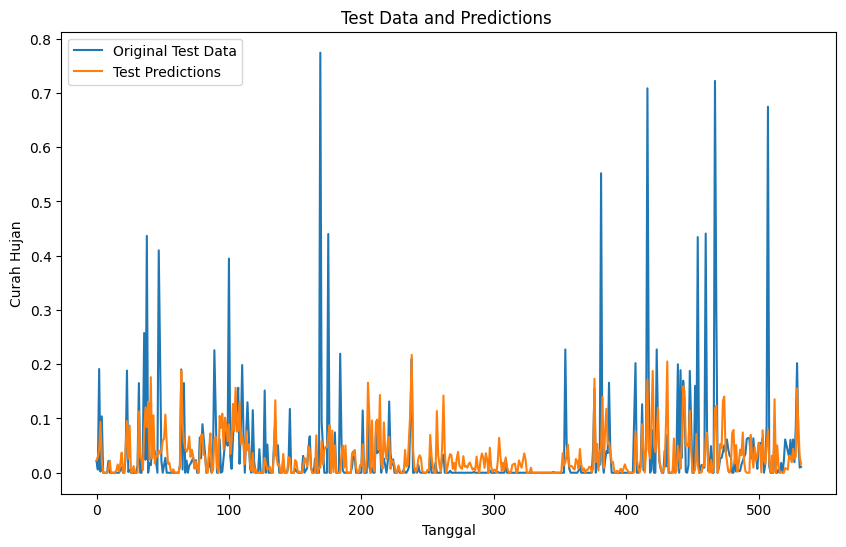

In [ ]:
# Visualisasi hasil prediksi vs data asli (dinormalisasi)
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, label='Original Test Data')
plt.plot(predictions, label='Test Predictions')
plt.legend()
plt.title('Test Data and Predictions ')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan')
plt.show()

# visualisasi model data test denormalisasi

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

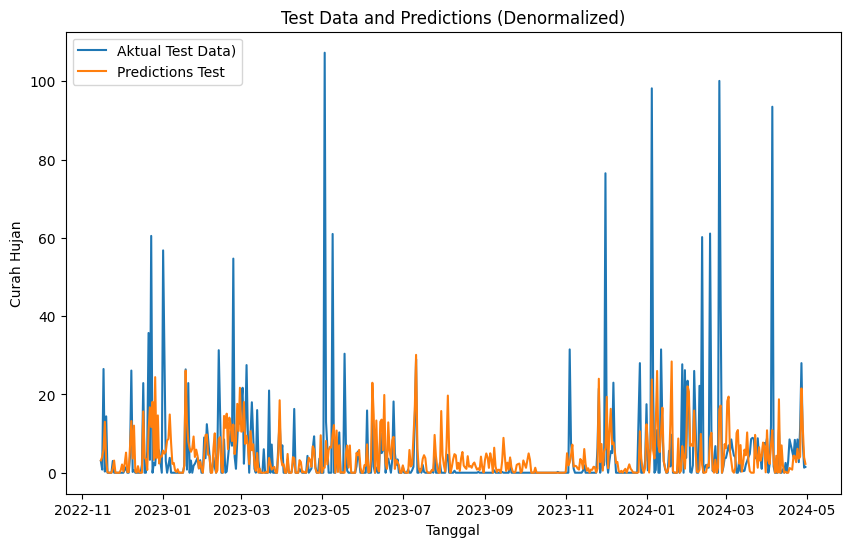

In [ ]:
# Visualisasi hasil prediksi vs data asli
plt.figure(figsize=(10, 6))
plt.plot(test_dates, test_original_denorm, label='Aktual Test Data)')
plt.plot(test_dates, predictions_denorm, label='Predictions Test')
plt.legend()
plt.title('Test Data and Predictions (Denormalized)')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan')
plt


# prediksi future


In [ ]:
#fitur lain tidak diikutsertakan hanya target yg lain diisi 0
future_steps = 2
window = X_test[-1]  # Ambil window terakhir
future_predictions_norm = []

for _ in range(future_steps):
    # Prediksi nilai normalized
    pred = model.predict(window.reshape(1, *window.shape))[0][0]
    future_predictions_norm.append(pred)

    # Buat input baru hanya untuk fitur target (kolom 0)
    next_step = np.zeros((1, window.shape[1]))  # shape: (1, n_features)
    next_step[0, 0] = pred

    # Update window (geser ke kiri, tambah prediksi di belakang)
    window = np.vstack([window[1:], next_step])

# === Setelah semua future prediksi selesai, DENORMALISASI ===
# Pastikan menggunakan scaler_target untuk denormalisasi target
future_predictions_denorm = scaler_target.inverse_transform(
    np.array(future_predictions_norm).reshape(-1, 1)
).ravel()  # Mengubah kembali ke bentuk 1D

#denormalisasi data asli (test data) juga menggunakan scaler_target
test_original_denorm = scaler_target.inverse_transform(y_test.reshape(-1, 1)).ravel()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
# Jika menggunakan tanggal asli sebagai index
test_dates = df.index[-len(test_original_denorm):]  # Ambil tanggal dari data asli test
future_dates = df.index[-1] + pd.to_timedelta(np.arange(1, future_steps+1), unit='D')


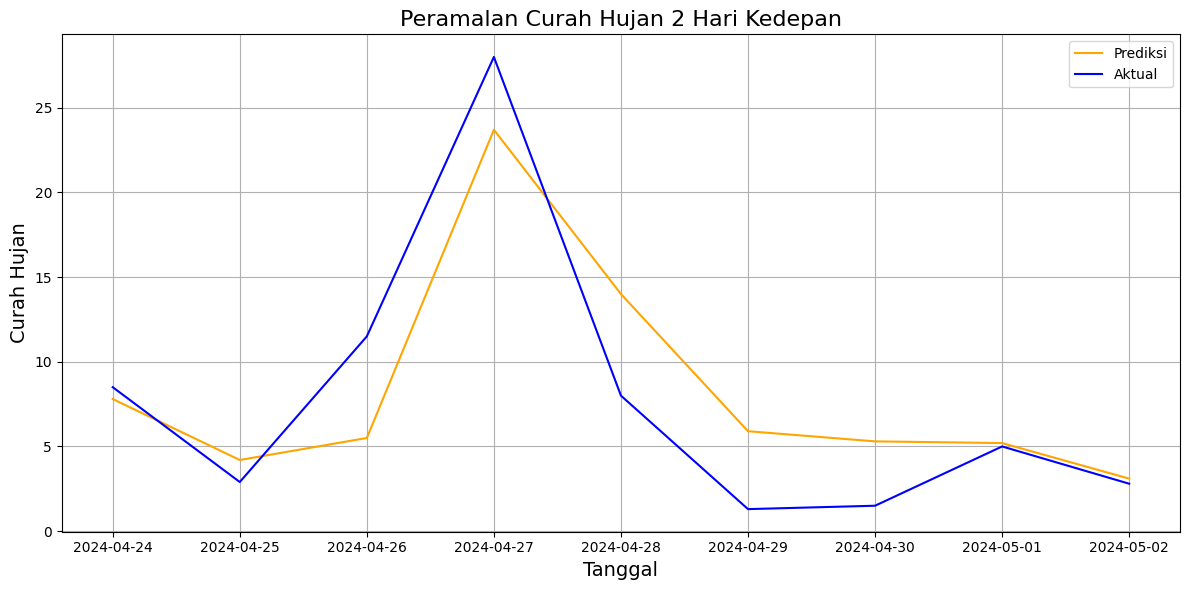

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
# Plot data asli (test aktual denormalized) untuk 7 hari terakhir
plt.plot(aktual_dates, aktual_values, label='Aktual', color='blue')
# Plot prediksi test (test prediction denormalized) untuk 7 hari terakhir
plt.plot(prediksi_dates, prediksi_values, label='Prediksi', color='orange')

# Menambahkan labels dan judul
plt.title('Peramalan Curah Hujan 2 Hari Kedepan')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan')
plt.legend()
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()

# Menampilkan plot
plt.show()